In [1]:
import numpy as np
import cv2 as cv
import os
import matplotlib.pyplot as plt

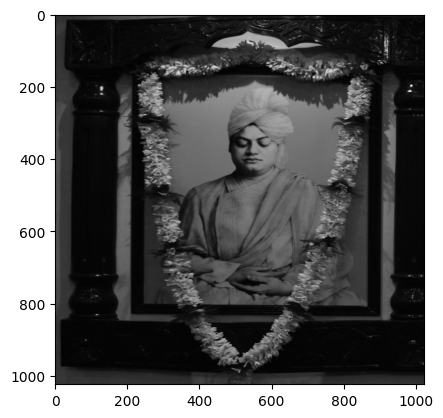

In [2]:
im = cv.imread("main.jpg",0)
plt.imshow(im,cmap='gray')
plt.show()

In [3]:
x = im.ravel()
binlist = []
for i in range(1024*1024):
    binlist.append(bin(x[i]))

In [4]:
def f0(num):
    t = 0b00000001
    t = num & t
    return t



bitMat0 = np.zeros((1024,1024), dtype=int)

k = 0
for i in range(1024):
    for j in range(1024):
        bitMat0[i][j] = f0(int(binlist[k],2))
        k = k+1
bitMat0

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [1, 1, 0, ..., 1, 1, 1],
       ...,
       [1, 0, 1, ..., 0, 1, 1],
       [1, 0, 1, ..., 1, 0, 1],
       [1, 1, 0, ..., 0, 0, 1]])

## Read Image 

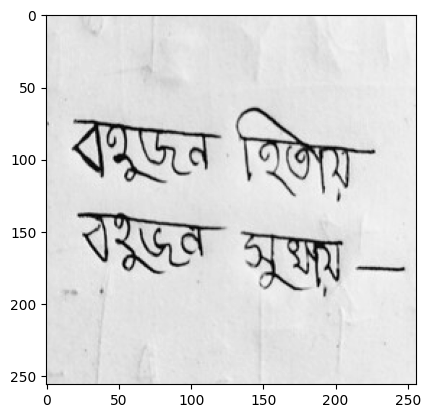

In [5]:
img1 = cv.imread("test.jpg",0)
rimg = cv.resize(img1, (256,256))
plt.imshow(rimg,cmap='gray')
plt.show()

In [6]:
(rimg)

array([[223, 225, 224, ..., 233, 233, 233],
       [224, 225, 223, ..., 234, 232, 231],
       [225, 225, 223, ..., 235, 233, 231],
       ...,
       [210, 210, 211, ..., 229, 229, 230],
       [213, 212, 213, ..., 229, 229, 229],
       [215, 213, 213, ..., 228, 229, 229]], dtype=uint8)

In [7]:
def int_to_binary_list(integer_input):
    binary_representation = bin(integer_input)[2:]
    binary_representation = binary_representation.zfill(8)
    binary_list = [int(bit) for bit in binary_representation]
    return binary_list

D2List = []

for i in range(256):
    for j in range(256):
        D2List.append(int_to_binary_list(rimg[i][j]))
D1List = []

len(D2List)

for i in range(256*256):
    for j in range(8):
        D1List.append(D2List[i][j])
D1List


[1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,


## Encoding

In [8]:
k = 0
encode = np.zeros((1024,1024))
for i in range(1024):
    for j in range(1024):
        if (k == (256*256*8)):
            break
        else:
            encode[i][j] = D1List[k] + bitMat0[i][j]
            k = k+1

In [9]:
temp = np.zeros((1024,1024), dtype=int)

In [10]:
for i in range(1024):
    for j in range(1024):
        temp[i][j] = im[i][j]


In [11]:
## Adding the Encoded Matrix
for i in range(1024):
    for j in range(1024):
        temp[i][j] = im[i][j] + encode[i][j] - bitMat0[i][j]

In [12]:
im[0][500]

133

In [13]:
temp[0][500]

133

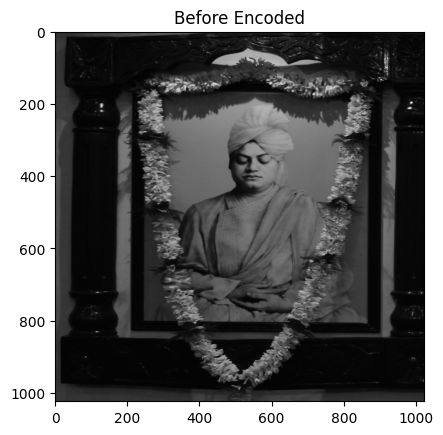

In [14]:
plt.imshow(im, cmap='gray')
plt.title("Before Encoded")
plt.show()

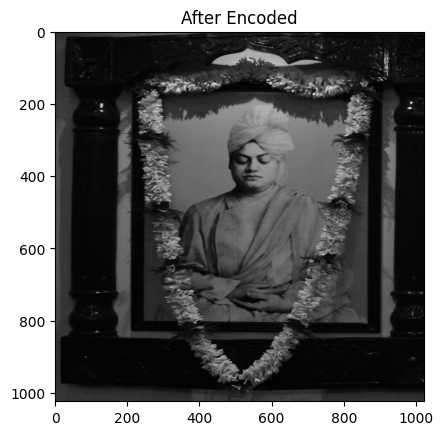

In [15]:
plt.imshow(temp, cmap='gray')
plt.title("After Encoded")
plt.show()

In [16]:
temp1 = np.zeros((1024,1024), dtype=int)

In [17]:
## Decription
temp1 = abs(temp - im)

In [18]:
temp1[0:1,0:8]

array([[1, 1, 0, 1, 1, 1, 1, 1]])

In [19]:
l = []
for i in range(1024):
    for j in range(1024):
        l.append(int(temp1[i][j]))
len(l)

1048576

In [20]:
decode = np.array(1048576)

In [21]:
j = 0
r = []
for i in range(0,1048576,8):
    if j == 256*256:
        break
    else:
        t = (128*l[i] + 64*l[i+1] + 32*l[i+2] + 16*l[i+3] + 8*l[i+4] + 4*l[i+5] + 2*l[i+6] + l[i+7])
        j = j+1
        r.append(t)
j
len(r)

65536

In [22]:
array_2d = np.array(r).reshape(256,256)
array_2d

array([[223, 225, 224, ..., 233, 233, 233],
       [224, 225, 223, ..., 234, 232, 231],
       [225, 225, 223, ..., 235, 233, 231],
       ...,
       [210, 210, 211, ..., 229, 229, 230],
       [213, 212, 213, ..., 229, 229, 229],
       [215, 213, 213, ..., 228, 229, 229]])

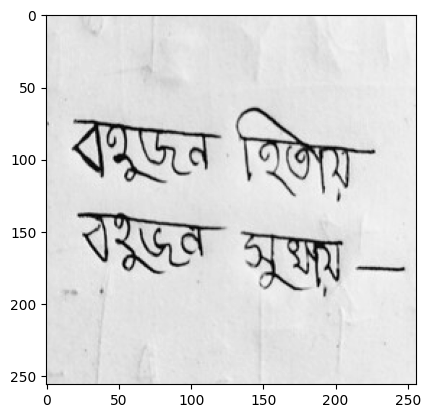

In [23]:
plt.imshow(array_2d,cmap='gray')
plt.show()

In [24]:
def calculate_mse(original_image, stego_image):
    if original_image.shape != stego_image.shape:
        raise ValueError("Images must have the same dimensions.")
    squared_diff = (original_image - stego_image)**2
    mse = np.mean(squared_diff)
    return mse

In [25]:
mse_value = calculate_mse(im, temp)

print(f"Mean Squared Error: {mse_value}")

Mean Squared Error: 0.559056282043457
